In [2]:


                                                      # PROJECT 7 #

In [3]:
                                      # NLP Project for Disaster Tweet Classification #

In [4]:
 # Importing Important Libraries To start The project #
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
 # Upload The Dataset Into Terminal #

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
dt = pd.read_csv("/content/drive/MyDrive/twitter_disaster.csv")

In [8]:
dt

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [9]:
# Data Preprocessing #

In [10]:
dt.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [11]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [12]:
dt.isnull().sum()


,0
id,0
keyword,61
location,2533
text,0
target,0


In [13]:
# Flling Missing Values #

dt['keyword'].fillna('unknown', inplace=True)

/tmp/ipython-input-13-965808804.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt['keyword'].fillna('unknown', inplace=True)


In [14]:
dt['location'].fillna('unspecified', inplace=True)

/tmp/ipython-input-14-41093874.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt['location'].fillna('unspecified', inplace=True)


In [15]:
dt.isnull().sum()

,0
id,0
keyword,0
location,0
text,0
target,0


In [16]:
print(dt['target'].value_counts())


target
0    4342
1    3271
Name: count, dtype: int64


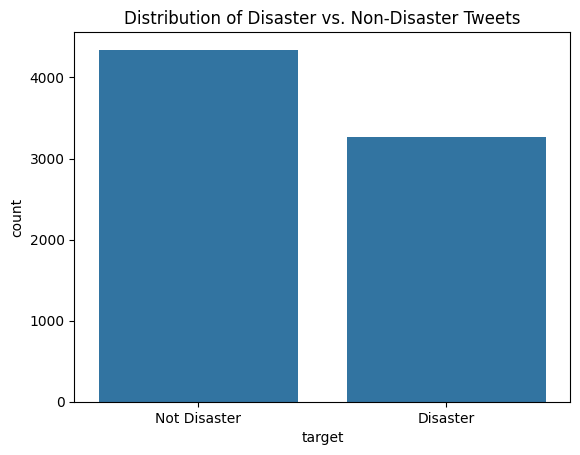

In [17]:
# Class distribution #
sns.countplot(x='target', data=dt)
plt.title("Distribution of Disaster vs. Non-Disaster Tweets")
plt.xticks([0, 1], ['Not Disaster', 'Disaster'])
plt.show()

In [18]:
# The height of each bar shows the count of tweets in each category.
# The dataset appears to be fairly balanced between disaster and non-disaster tweets

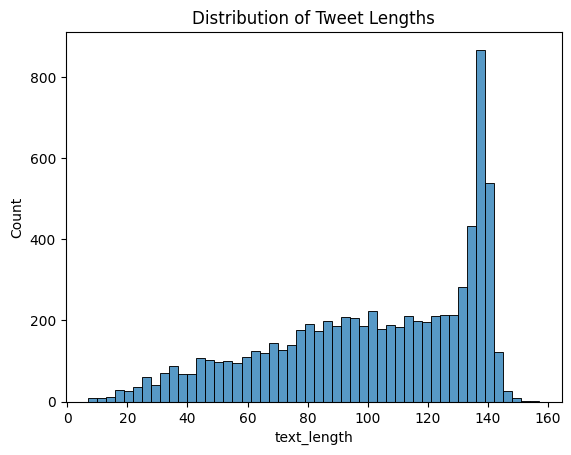

In [19]:

# Length of tweets #
dt['text_length'] = dt['text'].apply(len)
sns.histplot(dt['text_length'], bins=50)
plt.title("Distribution of Tweet Lengths")
plt.show()

In [20]:
 # Word Cloud Visualization #
from wordcloud import WordCloud

In [21]:

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    print()
    plt.show()



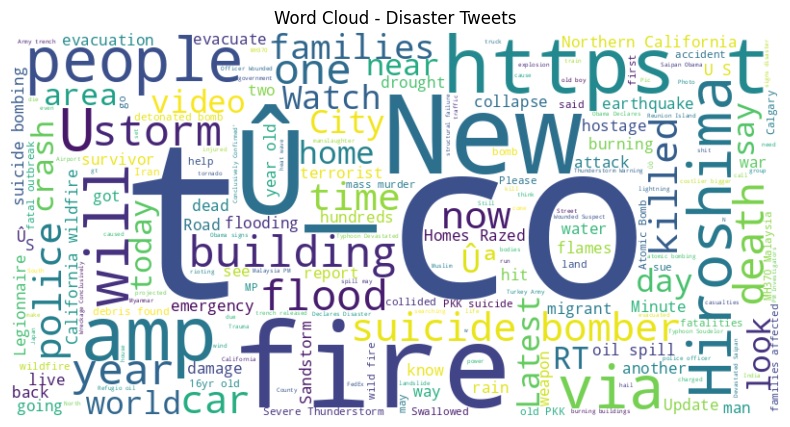

In [22]:
# Word cloud for disaster tweets #
plot_wordcloud(dt[dt['target'] == 1]['text'], "Word Cloud - Disaster Tweets")



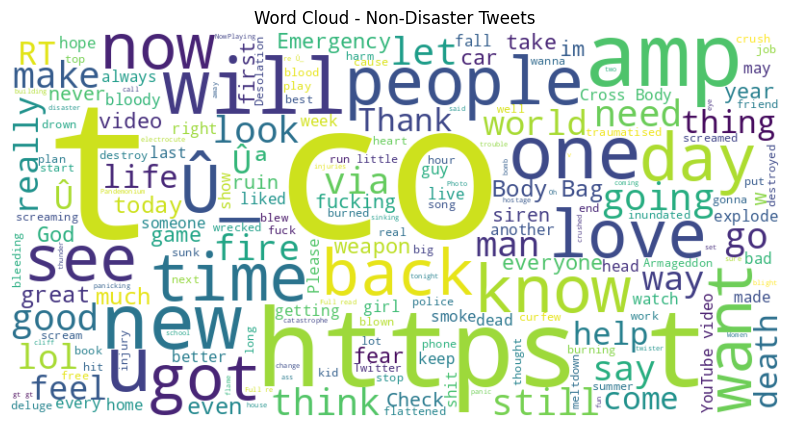

In [23]:
# Word cloud for non-disaster tweets
plot_wordcloud(dt[dt['target'] == 0]['text'], "Word Cloud - Non-Disaster Tweets")


In [24]:
# Step 2 Text Cleaning & Preprocessing #

In [25]:
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

dt['clean_text'] = dt['text'].apply(clean_text)

In [26]:
dt[['text', 'clean_text']].head()

,text,clean_text
0,Our Deeds are the Reason of this #earthquake M...,deeds reason earthquake may allah forgive us
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,residents asked shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo ruby alaska smoke wildfires pou...


In [27]:
 # Label Encodning #

In [28]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder #
le = LabelEncoder()

# Fit and transform the target labels #
y = le.fit_transform(dt['target'])

# Now split the data #


X = dt['clean_text']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Training size:", len(X_train))
print("Testing size:", len(X_test))


Training size: 6090
Testing size: 1523


In [29]:

                                     # Part 2 Feature Engineering and Model Selection #

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer



In [31]:


tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [32]:
 # add Tweet Length, Hashtags, Mentions as Features #



In [33]:

def extract_additional_features(text_series):
    tweet_lengths = text_series.apply(len)
    num_hashtags = text_series.str.count('#')
    num_mentions = text_series.str.count('@')
    return np.vstack((tweet_lengths, num_hashtags, num_mentions)).T

X_train_extra = extract_additional_features(X_train)
X_test_extra = extract_additional_features(X_test)

In [34]:
 #  Combine TF-IDF and Extra Features #

In [35]:
from scipy.sparse import hstack

X_train_combined = hstack([X_train_tfidf, X_train_extra])
X_test_combined = hstack([X_test_tfidf, X_test_extra])


In [36]:
                                     # Model Selection and Training #

In [37]:
# Logistic Regression #
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train_combined, y_train)


LogisticRegression(max_iter=200)

In [38]:
# Random Forest #

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_combined.toarray(), y_train)


RandomForestClassifier()

In [39]:
# Naive Bayes #
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_combined, y_train)




MultinomialNB()

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2']
}
grid = GridSearchCV(LogisticRegression(max_iter=500), param_grid, cv=5)
grid.fit(X_train_combined, y_train)

print("Best parameters:", grid.best_params_)
best_model = grid.best_estimator_


Best parameters: {'C': 1, 'penalty': 'l2'}


In [41]:
 # Word2Vec Embeddings#

In [42]:
#  Load and Apply Word2Vec Embeddings #

In [43]:


!pip install gensim --upgrade

import gensim.downloader as api
model = api.load("word2vec-google-news-300")
print(model.most_similar("king"))



[('kings', 0.7138045430183411), ('queen', 0.6510956883430481), ('monarch', 0.6413194537162781), ('crown_prince', 0.6204220056533813), ('prince', 0.6159993410110474), ('sultan', 0.5864824056625366), ('ruler', 0.5797567367553711), ('princes', 0.5646552443504333), ('Prince_Paras', 0.5432944297790527), ('throne', 0.5422105193138123)]


In [44]:
import gensim.downloader as api
from tqdm import tqdm
import numpy as np

# Load pretrained Word2Vec model (alternative to downloading .bin manually)
w2v_model = api.load("word2vec-google-news-300")

def get_average_word2vec(tokens, model, k=300):
    if not tokens:
        return np.zeros(k)
    valid_vectors = [model[word] for word in tokens if word in model]
    return np.mean(valid_vectors, axis=0) if valid_vectors else np.zeros(k)

# Tokenize clean text
X_train_tokens = X_train.apply(lambda x: x.split())
X_test_tokens = X_test.apply(lambda x: x.split())

# Apply Word2Vec
X_train_w2v = np.vstack([get_average_word2vec(tokens, w2v_model) for tokens in tqdm(X_train_tokens)])
X_test_w2v = np.vstack([get_average_word2vec(tokens, w2v_model) for tokens in tqdm(X_test_tokens)])


100%|██████████| 1523/1523 [00:00<00:00, 32474.64it/s]


In [45]:
#   Sentiment Scores with TextBlob #

In [46]:
pip install textblob


In [47]:
# Add Sentiment Polarity as Feature #

In [48]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

X_train_sentiment = X_train.apply(get_sentiment).values.reshape(-1, 1)
X_test_sentiment = X_test.apply(get_sentiment).values.reshape(-1, 1)


In [49]:
 #  Combine TF-IDF and Sentiment Features #

In [50]:
X_train_combined = hstack([X_train_tfidf, X_train_sentiment])
X_test_combined = hstack([X_test_tfidf, X_test_sentiment])

In [51]:
  # model Predication and Evaluation #

In [52]:
# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train_combined, y_train)


LogisticRegression(max_iter=200)

In [53]:
import pickle

# Save the trained model
with open("logistic_regression1_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model saved:", type(model))


✅ Model saved: <class 'sklearn.linear_model._logistic.LogisticRegression'>


In [54]:
# Predict #
y_pred = model.predict(X_test_combined)


In [55]:
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [56]:
# Random Forest #

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_combined.toarray(), y_train)


RandomForestClassifier()

In [57]:

# Make predictions on the test set #
y_pred = rf_model.predict(X_test_combined.toarray())


In [58]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [59]:
 # Model Evaluation for Both Logistic Regression and random forest #

              precision    recall  f1-score   support

           0       0.81      0.90      0.86       869
           1       0.85      0.72      0.78       654

    accuracy                           0.83      1523
   macro avg       0.83      0.81      0.82      1523
weighted avg       0.83      0.83      0.82      1523



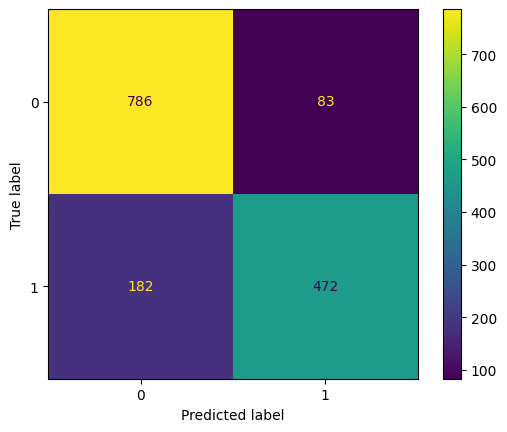

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_combined)


print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


              precision    recall  f1-score   support

           0       0.79      0.88      0.83       869
           1       0.81      0.69      0.74       654

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.79      1523



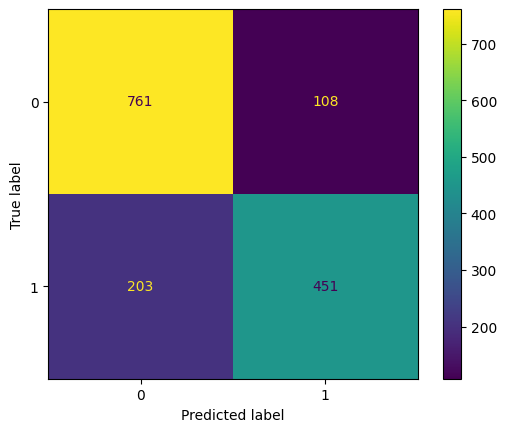

In [61]:
y_pred = rf_model.predict(X_test_combined.toarray())
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [62]:
#| Metric        | Matrix 1  | Matrix 2 | Better In |
# ------------- | --------- | -------- | --------- |
# **Accuracy**  | **84.3%** | 81.9%    | Matrix 1  |
# **Precision** | **84.8%** | 81.5%    | Matrix 1  |
# **Recall**    | **72.0%** | 69.3%    | Matrix 1  |
# **F1-Score**  | **0.777** | 0.748    | Matrix 1  |


In [63]:
 # Matrix 1 clearly outperforms Matrix 2 on all classification metrics.

 # It shows fewer false positives (84 vs 103) and fewer false negatives (183 vs 201).

 #So, Matrix 1's model which is Logistic Regression  is better overall, especially when both precision and recall matter (e.g., disaster tweet detection).



In [64]:
# ROC AND PR CURVE #


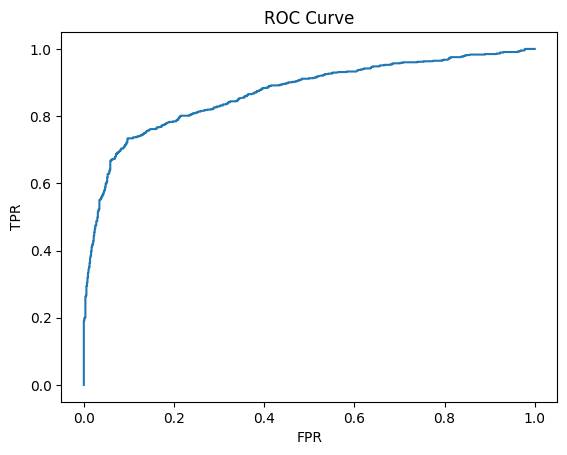

In [65]:
from sklearn.metrics import roc_auc_score

y_proba =  model.predict_proba(X_test_combined)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()


In [66]:
# saving Logistic Regression and Random Forest Models #



In [67]:
with open("logistic_regression1_model.pkl", "wb") as f:
    pickle.dump(model, f)
    print("MODEL TYPE:", type(model))

MODEL TYPE: <class 'sklearn.linear_model._logistic.LogisticRegression'>


In [68]:
import joblib
joblib.dump(rf_model, 'random_forest1_model.pkl')


['random_forest1_model.pkl']

In [69]:
                                          #LSTM MODEL #

In [70]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [71]:
# Data Preparation Model #

In [72]:


def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@[\w]*', '', text)
    text = re.sub(r'#[\w]*', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    text = ' '.join([w for w in text.split() if w not in stopwords.words('english')])
    return text

dt['clean_text'] = dt['text'].astype(str).apply(clean_text)


In [73]:
# Tokenize #

In [74]:
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(dt['clean_text'])
sequences = tokenizer.texts_to_sequences(dt['clean_text'])
X = pad_sequences(sequences, maxlen=max_len)

y = dt['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [75]:
 # Build Deep Learning Model #

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, ))
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, max_len))

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,378,945 (5.26 MB)

 Trainable params: 1,378,945 (5.26 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
# Model training #

In [78]:
training_log = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
153/153 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.6292 - loss: 0.6441 - val_accuracy: 0.8030 - val_loss: 0.4543
Epoch 2/5
153/153 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8702 - loss: 0.3256 - val_accuracy: 0.7964 - val_loss: 0.4887
Epoch 3/5
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9364 - loss: 0.1906 - val_accuracy: 0.7750 - val_loss: 0.6277
Epoch 4/5
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9563 - loss: 0.1300 - val_accuracy: 0.7742 - val_loss: 0.7108
Epoch 5/5
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9635 - loss: 0.1028 - val_accuracy: 0.7603 - val_loss: 0.8627


In [79]:
model.save("disaster_lstm_model.h5")
import joblib
joblib.dump(tokenizer, "tokenizer.pkl")


['tokenizer.pkl']

In [80]:
# calssification and Confusion Matrix #

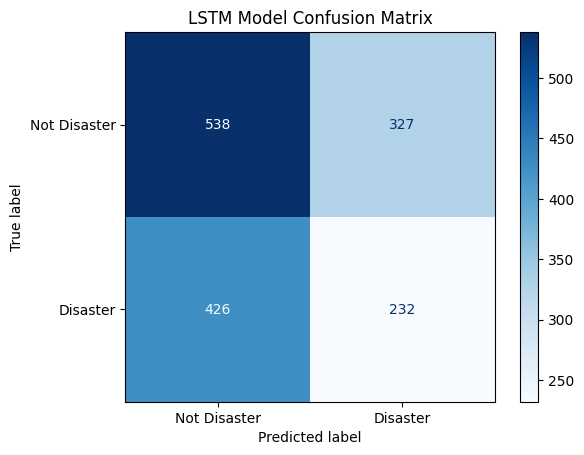

              precision    recall  f1-score   support

Not Disaster       0.56      0.62      0.59       865
    Disaster       0.42      0.35      0.38       658

    accuracy                           0.51      1523
   macro avg       0.49      0.49      0.48      1523
weighted avg       0.50      0.51      0.50      1523



In [81]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix #
cm = confusion_matrix (y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Not Disaster", "Disaster"])
disp.plot(cmap="Blues")
plt.title("LSTM Model Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_test, y_pred, target_names=["Not Disaster", "Disaster"]))


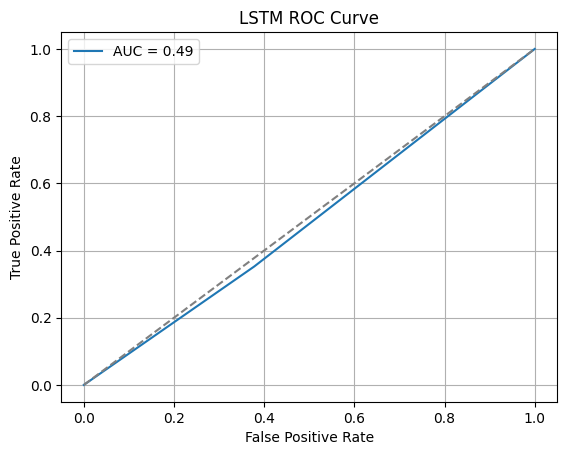

In [82]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LSTM ROC Curve")
plt.legend()
plt.grid()
plt.show()


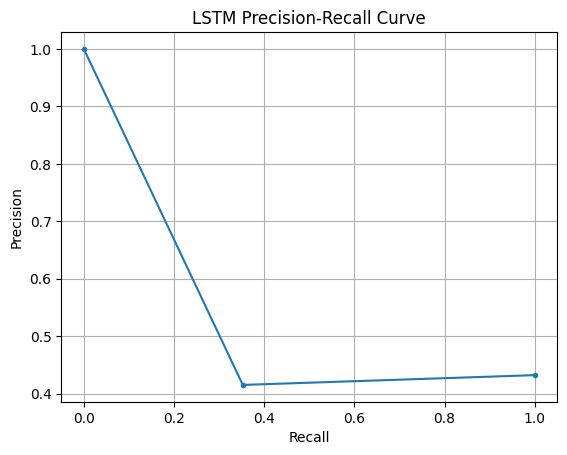

In [83]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("LSTM Precision-Recall Curve")
plt.grid()
plt.show()


In [84]:
# Model Prediction #

In [85]:
from tensorflow.keras.models import load_model
model = load_model("disaster_lstm_model.h5")
tokenizer = joblib.load("tokenizer.pkl")

def predict_tweet(tweet):
    cleaned = clean_text(tweet)
    seq = tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(seq, maxlen=max_len)
    pred = model.predict(padded)[0][0]
    return "Disaster" if pred >= 0.5 else "Not Disaster"

print(predict_tweet("Flood warning in New York City!"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
Disaster


In [86]:
 # Deployment with Web Interface #

In [87]:
 # Web deployment #

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import pickle

X_train_tfidf = tfidf.fit_transform(X_train.ravel().astype(str))
X_test_tfidf = tfidf.transform(X_test.ravel().astype(str))



In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import pickle

# Example raw text and labels
X_train_raw_texts = ["Heavy flood in area", "Sunshine and picnic", "Earthquake shakes ground", "Having fun at beach"]
y_train = [1, 0, 1, 0]

# Step 1: Vectorize raw text
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_raw_texts)

# Step 2: Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

# Step 3: Save model and vectorizer
with open("logistic_regression1_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)


In [107]:
from google.colab import files
files.download("logistic_regression1_model.pkl")
files.download("vectorizer.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>